In [1]:
import warnings
warnings.simplefilter('ignore')

import sys, os
sys.path.append('../../codes/')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import kernelFunc as kf
import kernelSVM as svm
import data
import matplotlib.pylab as plt

kernelType = 2

#-------------------
# 1. データの作成
myData = data.classification(negLabel=-1.0,posLabel=1.0)
myData.makeData(dataType=4)
#-------------------

#-------------------
# 2. データを学習と評価用に分割
dNum = int(len(myData.X)*0.9)  # 学習データ数
# 学習データ（全体の90%）
Xtr = myData.X[:dNum]
Ytr = myData.Y[:dNum]

# 評価データ（全体の10%）
Xte = myData.X[dNum:]
Yte = myData.Y[dNum:]
#-------------------

#-------------------
# 3. 標準化
xMean = np.mean(Xtr,axis=0)
xStd = np.std(Xtr,axis=0)
Xtr = (Xtr-xMean)/xStd
Xte = (Xte-xMean)/xStd
#-------------------

#-------------------
# 3.5. モデル選択
# ハイパーパラメータの候補
if kernelType == 1: # ガウスカーネルの幅
    kernelParams = [0.1,0.25,0.5,0.8,1.0,1.2,1.5,1.8,2.0,2.5,3.0]
elif kernelType == 2: # 多項式カーネルのオーダー
    kernelParams = [1.0,2.0,3.0,4.0,5.0]

# fold数
foldNum = 5

# 各foldで用いる学習データ数
dNumFold = int(dNum/foldNum)

# ランダムにデータを並べ替える
randInds = np.random.permutation(len(Xtr))

# 正解率を格納する変数
accuracies = np.zeros([len(kernelParams),foldNum])

# ハイパーパラメータの候補のループ
for paramInd in range(len(kernelParams)):

    # 交差検証によ正解率の推定
    for foldInd in range(foldNum):
    
        # 学習データ数dNumFold分左にシフト
        randIndsTmp = np.roll(randInds,-dNumFold*foldInd)
        
        # 学習と評価データの分割
        XtrTmp = Xtr[randIndsTmp[dNumFold:]]
        YtrTmp = Ytr[randIndsTmp[dNumFold:]]
        XteTmp = Xtr[randIndsTmp[:dNumFold]]
        YteTmp = Ytr[randIndsTmp[:dNumFold]]

        try:
            # 手順1) SVMのモデルの学習
            myKernel = kf.kernelFunc(kernelType=kernelType,kernelParam=kernelParams[paramInd])
            myModel = svm.SVM(XtrTmp,YtrTmp,kernelFunc=myKernel)
            myModel.trainSoft(0.5)
        except:
            continue

        # 手順2) 評価データに対する正解率を格納
        accuracies[paramInd,foldInd] = myModel.accuracy(XteTmp,YteTmp)

# 手順3) 平均正解率が最大のパラメータ
selectedParam = kernelParams[np.argmax(np.mean(accuracies,axis=1))]
print(f"選択したパラメータ:{selectedParam}")
#-------------------

#-------------------
# 3.75 正解率のプロット
plt.plot(kernelParams,np.mean(accuracies,axis=1),'r-o',lineWidth=2)
plt.xlabel("カーネルパラメータ",fontSize=14)
plt.ylabel("推定した正解率",fontSize=14)
# plt.savefig(f"../results/kernelSVM_CV_{myData.dataType}_{kernelType}.pdf")
#-------------------

#-------------------
# 4. カーネル関数の作成
myKernel = kf.kernelFunc(kernelType=kernelType,kernelParam=selectedParam)
#-------------------

#-------------------
# 5. SVMのモデルの学習
myModel = svm.SVM(Xtr,Ytr,kernelFunc=myKernel)
myModel.trainSoft(0.5)
#-------------------

#-------------------
# 6. SVMモデルの評価
print(f"モデルパラメータ:\nw={myModel.w}\nb={myModel.b}")
print(f"評価データの正解率={myModel.accuracy(Xte,Yte):.2f}")
#-------------------

     pcost       dcost       gap    pres   dres
 0: -4.0614e+01 -1.0748e+02  8e+02  6e+00  2e-15
 1: -1.9866e+01 -8.6367e+01  1e+02  4e-01  2e-15
 2: -1.8511e+01 -2.8851e+01  1e+01  8e-16  9e-16
 3: -2.1443e+01 -2.3996e+01  3e+00  6e-16  1e-15
 4: -2.2095e+01 -2.3328e+01  1e+00  3e-16  1e-15
 5: -2.2402e+01 -2.2904e+01  5e-01  4e-16  9e-16
 6: -2.2554e+01 -2.2732e+01  2e-01  2e-16  1e-15
 7: -2.2629e+01 -2.2648e+01  2e-02  3e-16  1e-15
 8: -2.2638e+01 -2.2638e+01  2e-04  2e-16  1e-15
 9: -2.2638e+01 -2.2638e+01  2e-06  2e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5538e+01 -1.0499e+02  8e+02  6e+00  2e-15
 1: -1.7184e+01 -8.2902e+01  1e+02  4e-01  2e-15
 2: -1.4860e+01 -2.5784e+01  1e+01  7e-16  2e-15
 3: -1.7433e+01 -1.9871e+01  2e+00  3e-16  1e-15
 4: -1.8005e+01 -1.9235e+01  1e+00  2e-16  1e-15
 5: -1.8392e+01 -1.8734e+01  3e-01  3e-16  9e-16
 6: -1.8521e+01 -1.8583e+01  6e-02  2e-16  1e-15
 7: -1.8550e+01 -1.8551e+01  1e-03  7e-16  1e-1

 4: -4.9700e+00 -7.4521e+00  3e+00  6e-03  2e-15
 5: -5.3798e+00 -6.2923e+00  1e+00  2e-03  2e-15
 6: -5.5150e+00 -5.9036e+00  4e-01  2e-16  2e-15
 7: -5.6384e+00 -5.7380e+00  1e-01  2e-16  2e-15
 8: -5.6692e+00 -5.6924e+00  2e-02  4e-16  3e-15
 9: -5.6788e+00 -5.6816e+00  3e-03  2e-16  3e-15
10: -5.6801e+00 -5.6802e+00  8e-05  7e-16  2e-15
11: -5.6801e+00 -5.6801e+00  8e-07  8e-16  2e-15
Optimal solution found.
モデルパラメータ:
w=[[ 2.44106528e+00]
 [-2.40181726e-01]
 [ 3.56449969e+00]
 [ 3.01169126e+00]
 [-3.22306151e-01]
 [ 2.33126836e+00]
 [-5.88868533e-01]
 [ 3.37795230e+00]
 [ 3.26084126e+00]
 [-4.19772805e-01]
 [ 2.55027604e+00]
 [ 2.66617817e-03]
 [ 3.16476279e+00]
 [ 3.17105307e-01]
 [ 2.31710524e+00]
 [ 2.76358881e+00]
 [ 5.89119159e+00]
 [-3.29482940e-01]
 [ 3.41697356e+00]
 [ 2.31710541e+00]
 [ 3.91280474e+00]
 [ 1.75815467e+00]
 [-5.78951853e-01]
 [ 6.01158299e+00]
 [ 2.05378295e+00]
 [-5.45238950e-01]
 [-4.18136849e-01]
 [-3.58074005e-01]
 [ 3.03711307e+00]
 [ 4.81120855e+00]
 [

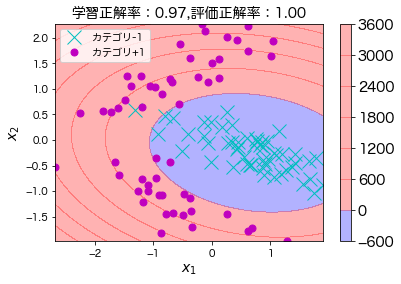

In [4]:
#-------------------
# 7. 真値と予測値のプロット
myModel.plotModel2D(X=Xtr,Y=Ytr,xLabel=myData.xLabel,yLabel=myData.yLabel,
    title=f"学習正解率：{myModel.accuracy(Xtr,Ytr):.2f},評価正解率：{myModel.accuracy(Xte,Yte):.2f}",
    isLinePlot=False)
#-------------------

     pcost       dcost       gap    pres   dres
 0: -6.1819e+01 -1.0168e+02  6e+02  5e+00  2e-15
 1: -3.1160e+01 -8.3787e+01  6e+01  7e-02  2e-15
 2: -3.4847e+01 -4.0868e+01  6e+00  7e-03  1e-15
 3: -3.7312e+01 -3.8915e+01  2e+00  2e-03  1e-15
 4: -3.7998e+01 -3.8298e+01  3e-01  2e-04  1e-15
 5: -3.8139e+01 -3.8171e+01  3e-02  2e-05  2e-15
 6: -3.8155e+01 -3.8156e+01  1e-03  7e-07  2e-15
 7: -3.8155e+01 -3.8155e+01  1e-05  7e-09  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4801e+01 -9.1643e+01  4e+02  4e+00  2e-15
 1: -3.4266e+01 -7.5176e+01  4e+01  2e-15  2e-15
 2: -4.0139e+01 -4.2962e+01  3e+00  3e-16  1e-15
 3: -4.1049e+01 -4.2712e+01  2e+00  2e-15  1e-15
 4: -4.1746e+01 -4.2230e+01  5e-01  6e-16  1e-15
 5: -4.1934e+01 -4.2039e+01  1e-01  2e-16  1e-15
 6: -4.1982e+01 -4.1991e+01  9e-03  7e-16  1e-15
 7: -4.1988e+01 -4.1988e+01  2e-04  2e-15  1e-15
 8: -4.1988e+01 -4.1988e+01  2e-06  2e-16  1e-15
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -2.3095e+01 -1.2900e+02  1e+03  6e+00  8e-15
 1: -1.0663e+01 -9.9291e+01  2e+02  9e-01  6e-15
 2: -4.6725e+00 -4.2304e+01  6e+01  2e-01  3e-15
 3: -3.3165e+00 -1.1923e+01  1e+01  3e-02  2e-15
 4: -3.9023e+00 -7.5850e+00  4e+00  8e-03  2e-15
 5: -4.3994e+00 -6.0987e+00  2e+00  2e-03  2e-15
 6: -4.6856e+00 -5.4185e+00  8e-01  5e-04  1e-15
 7: -4.8525e+00 -5.1374e+00  3e-01  1e-04  2e-15
 8: -4.9294e+00 -5.0075e+00  8e-02  3e-05  2e-15
 9: -4.9564e+00 -4.9604e+00  4e-03  3e-16  2e-15
10: -4.9583e+00 -4.9584e+00  4e-05  2e-16  2e-15
11: -4.9584e+00 -4.9584e+00  4e-07  2e-16  2e-15
Optimal solution found.
モデルパラメータ:
w=[[ 2.99863767e+00]
 [ 8.34358732e-02]
 [ 3.44295966e+00]
 [ 4.68945260e+00]
 [ 1.00870054e-02]
 [ 4.01942434e+00]
 [ 8.70476577e-02]
 [ 7.18450747e+00]
 [ 5.01124189e+00]
 [ 5.24481072e-01]
 [ 4.15412686e+00]
 [ 3.73640371e-02]
 [ 2.98086864e+00]
 [-6.13475630e-02]
 [ 3.46945523e+00]
 [ 5.46460000e+00]
 [ 9.92068836e+00]
 [ 2.

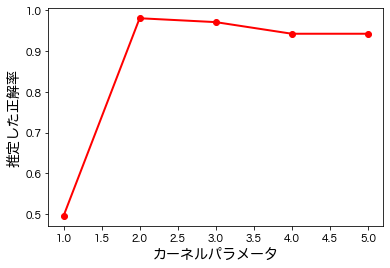

In [5]:
#-------------------
# 1. データの作成
myData = data.classification(negLabel=-1.0,posLabel=1.0)
myData.makeData(dataType=5)
#-------------------

#-------------------
# 2. データを学習と評価用に分割
dNum = int(len(myData.X)*0.9)  # 学習データ数
# 学習データ（全体の90%）
Xtr = myData.X[:dNum]
Ytr = myData.Y[:dNum]

# 評価データ（全体の10%）
Xte = myData.X[dNum:]
Yte = myData.Y[dNum:]
#-------------------

#-------------------
# 3. 標準化
xMean = np.mean(Xtr,axis=0)
xStd = np.std(Xtr,axis=0)
Xtr = (Xtr-xMean)/xStd
Xte = (Xte-xMean)/xStd
#-------------------

#-------------------
# 3.5. モデル選択
# ハイパーパラメータの候補
if kernelType == 1: # ガウスカーネルの幅
    kernelParams = [0.1,0.25,0.5,0.8,1.0,1.2,1.5,1.8,2.0,2.5,3.0]
elif kernelType == 2: # 多項式カーネルのオーダー
    kernelParams = [1.0,2.0,3.0,4.0,5.0]

# fold数
foldNum = 5

# 各foldで用いる学習データ数
dNumFold = int(dNum/foldNum)

# ランダムにデータを並べ替える
randInds = np.random.permutation(len(Xtr))

# 正解率を格納する変数
accuracies = np.zeros([len(kernelParams),foldNum])

# ハイパーパラメータの候補のループ
for paramInd in range(len(kernelParams)):

    # 交差検証によ正解率の推定
    for foldInd in range(foldNum):
    
        # 学習データ数dNumFold分左にシフト
        randIndsTmp = np.roll(randInds,-dNumFold*foldInd)
        
        # 学習と評価データの分割
        XtrTmp = Xtr[randIndsTmp[dNumFold:]]
        YtrTmp = Ytr[randIndsTmp[dNumFold:]]
        XteTmp = Xtr[randIndsTmp[:dNumFold]]
        YteTmp = Ytr[randIndsTmp[:dNumFold]]

        try:
            # 手順1) SVMのモデルの学習
            myKernel = kf.kernelFunc(kernelType=kernelType,kernelParam=kernelParams[paramInd])
            myModel = svm.SVM(XtrTmp,YtrTmp,kernelFunc=myKernel)
            myModel.trainSoft(0.5)
        except:
            continue

        # 手順2) 評価データに対する正解率を格納
        accuracies[paramInd,foldInd] = myModel.accuracy(XteTmp,YteTmp)

# 手順3) 平均正解率が最大のパラメータ
selectedParam = kernelParams[np.argmax(np.mean(accuracies,axis=1))]
print(f"選択したパラメータ:{selectedParam}")
#-------------------

#-------------------
# 3.75 正解率のプロット
plt.plot(kernelParams,np.mean(accuracies,axis=1),'r-o',lineWidth=2)
plt.xlabel("カーネルパラメータ",fontSize=14)
plt.ylabel("推定した正解率",fontSize=14)
# plt.savefig(f"../results/kernelSVM_CV_{myData.dataType}_{kernelType}.pdf")
#-------------------

#-------------------
# 4. カーネル関数の作成
myKernel = kf.kernelFunc(kernelType=kernelType,kernelParam=selectedParam)
#-------------------

#-------------------
# 5. SVMのモデルの学習
myModel = svm.SVM(Xtr,Ytr,kernelFunc=myKernel)
myModel.trainSoft(0.5)
#-------------------

#-------------------
# 6. SVMモデルの評価
print(f"モデルパラメータ:\nw={myModel.w}\nb={myModel.b}")
print(f"評価データの正解率={myModel.accuracy(Xte,Yte):.2f}")
#-------------------

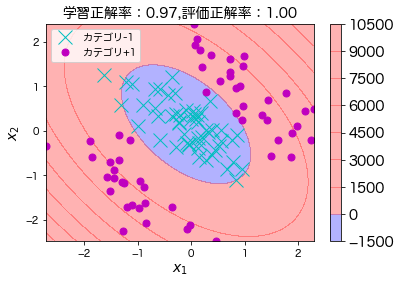

In [6]:
#-------------------
# 7. 真値と予測値のプロット
myModel.plotModel2D(X=Xtr,Y=Ytr,xLabel=myData.xLabel,yLabel=myData.yLabel,
    title=f"学習正解率：{myModel.accuracy(Xtr,Ytr):.2f},評価正解率：{myModel.accuracy(Xte,Yte):.2f}",
    isLinePlot=False)
#-------------------